# Lista semana 7 - Pandas 2


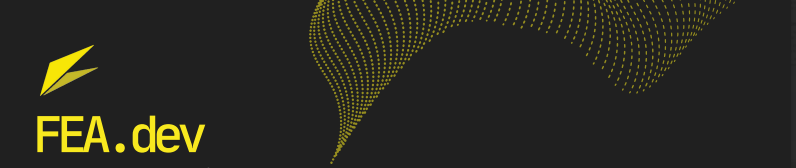

#### **Fala devs, beleza?**
Mais uma lista dessa biblioteca tão importante e interessante: o Pandas! Estamos quase chegando ao fim, então bom trabalho!

In [250]:
# Importe a biblioteca Pandas e as demais que pretende usar

## Exercício 1:
Dado o seguinte DataFrame:

In [251]:
data = {'Nome': ['Arthur', 'Bruna', 'Cinthya', 'Penini', 'Guilherme', 'Pedro', 'Maria', 'Ana', 'Raquel'],
        'Idade': [25, 30, 22, 35, 28, 19, 27, 39, 29],
        'Salário': [4000, 4500, 3500, 5500, 4800, 3000, 6000, 5000, 4500]}

df = pd.DataFrame(data)

a) Use a função loc para selecionar as linhas correspondentes aos indivíduos com idades entre 25 e 30 anos.

In [252]:
import pandas as pd

data = {'Nome': ['Arthur', 'Bruna', 'Cinthya', 'Penini', 'Guilherme', 'Pedro', 'Maria', 'Ana', 'Raquel'],
        'Idade': [25, 30, 22, 35, 28, 19, 27, 39, 29],
        'Salário': [4000, 4500, 3500, 5500, 4800, 3000, 6000, 5000, 4500]}

df = pd.DataFrame(data)

bla = df.loc[df["Idade"] > 25, "Nome"]

print(bla)

1        Bruna
3       Penini
4    Guilherme
6        Maria
7          Ana
8       Raquel
Name: Nome, dtype: object


b) Use a função iloc para selecionar as linhas correspondentes aos indivíduos na primeira e última posição do DataFrame e tire a média de seus salários.

In [253]:
import pandas as pd

data = {'Nome': ['Arthur', 'Bruna', 'Cinthya', 'Penini', 'Guilherme', 'Pedro', 'Maria', 'Ana', 'Raquel'],
        'Idade': [25, 30, 22, 35, 28, 19, 27, 39, 29],
        'Salário': [4000, 4500, 3500, 5500, 4800, 3000, 6000, 5000, 4500]}

df = pd.DataFrame(data)

bla = df.iloc[[0, -1],[2]]

media = bla.mean()

print(media)

Salário    4250.0
dtype: float64


## Exercício 2:
Dado o seguinte DataFrame:

In [254]:
import pandas as pd

data = {'Fábrica': ['A', 'B', 'A', 'C', 'B', 'A', 'B', 'A', 'C', 'C', 'B', 'A'],
        'Valor': [100, 200, 150, 300, 250, 120, 140, 230, 390, 80, 160, 210]}

df = pd.DataFrame(data)

a) Calcule a média dos valores para cada fábrica.

In [255]:
df.groupby('Fábrica')['Valor'].mean()

Fábrica
A    162.000000
B    187.500000
C    256.666667
Name: Valor, dtype: float64

b) Calcule a soma dos valores para cada fábrica. O que possui a maior soma também possui a maior média? Qual a razão disso ocorrer ou não?

In [256]:
df.groupby("Fábrica")["Valor"].sum()

# isso nao ocorre pois mesmo que tenha a maior media, a frequencia pode ser menor, o que diminui bastante o valor total da soma

Fábrica
A    810
B    750
C    770
Name: Valor, dtype: int64

## Exercício 3:
Dado o seguinte DataFrame:

In [257]:
data = {'Data': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02'],
        'Festas': ['A', 'B', 'A', 'B'],
        'Participantes': [100, 150, 200, 120]}

df = pd.DataFrame(data)


Crie uma tabela dinâmica (pivot table) que mostre os participantes totais para cada festa em cada data.

In [9]:
table = pd.pivot_table(df, values="Participantes", index=["Festas"], columns=["Data"], aggfunc="sum")
table

NameError: name 'df' is not defined

## Exercício 4:
Dado os seguintes DataFrames:

In [259]:
df1 = pd.DataFrame({'Chave': ['A', 'B', 'C', 'D'],
                    'Valor1': [10, 12, 6, 4]})

df2 = pd.DataFrame({'Chave': ['B', 'D', 'E', 'F'],
                    'Valor2': [9, 6, 11, 8]})

df3 = pd.DataFrame({'Chave': ['C', 'D', 'E', 'G'],
                    'Valor3': [10, 7, 14, 15]})

a) Combine os DataFrames df1 e df2 com base na coluna 'Chave', e deixe a coluna chave como index. Inclua apenas as chaves que aparecem em ambos os dataframes

In [260]:
df1 = pd.DataFrame({'Chave': ['A', 'B', 'C', 'D'],
                    'Valor1': [10, 12, 6, 4]})

df2 = pd.DataFrame({'Chave': ['B', 'D', 'E', 'F'],
                    'Valor2': [9, 6, 11, 8]})

df3 = pd.DataFrame({'Chave': ['C', 'D', 'E', 'G'],
                    'Valor3': [10, 7, 14, 15]})

df1.merge(df2, left_on="Chave", right_on="Chave")

,Chave,Valor1,Valor2
0,B,12,9
1,D,4,6


b) Combine os DataFrames df1, df2 e df3, incluindo todas as chaves e valores. Defina "Chave" como index e substitua os valores não existentes por 0.

In [261]:
df1 = pd.DataFrame({'Chave': ['A', 'B', 'C', 'D'],
                    'Valor1': [10, 12, 6, 4]})

df2 = pd.DataFrame({'Chave': ['B', 'D', 'E', 'F'],
                    'Valor2': [9, 6, 11, 8]})

df3 = pd.DataFrame({'Chave': ['C', 'D', 'E', 'G'],
                    'Valor3': [10, 7, 14, 15]})


df1 = df1.merge(df2, how="outer")
df1 = df1.merge(df3, how="outer")
df1 = df1.set_index('Chave')
df1 = df1.fillna(0)

df1

,Valor1,Valor2,Valor3
Chave,,,
A,10.0,0.0,0.0
B,12.0,9.0,0.0
C,6.0,0.0,10.0
D,4.0,6.0,7.0
E,0.0,11.0,14.0
F,0.0,8.0,0.0
G,0.0,0.0,15.0


c) Adicione uma nova coluna ao dataframe, contendo a soma do valor 1, 2 e 3 para cada chave.

In [8]:
import pandas as pd

df1 = pd.DataFrame({'Chave': ['A', 'B', 'C', 'D'],
                    'Valor1': [10, 12, 6, 4]})

df2 = pd.DataFrame({'Chave': ['B', 'D', 'E', 'F'],
                    'Valor2': [9, 6, 11, 8]})

df3 = pd.DataFrame({'Chave': ['C', 'D', 'E', 'G'],
                    'Valor3': [10, 7, 14, 15]})


df1 = df1.merge(df2, how="outer")
df1 = df1.merge(df3, how="outer")
df1 = df1.set_index('Chave')
df1 = df1.fillna(0)
df1["Soma"] = df1["Valor1"] + result["Valor2"] + result["Valor3"]

## Exercício 5
Vamos importar dados de ações utilizando a biblioteca Yahoo Finance, e você trabalhará em cima deste dataframe.

In [263]:
# Caso não tenha essa biblioteca instalada, rode o código a seguir:
%pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
^C
Note: you may need to restart the kernel to use updated packages.


In [264]:
# importando a biblioteca:
import yfinance as yf


ticker_symbol = ["PETR4.SA"]  # Substitua pela ação de sua escolha, se quiser
start_date = "2020-01-01"
end_date = "2024-01-01"
#dataframe:
data = yf.download(ticker_symbol, start=start_date, end=end_date)


ModuleNotFoundError: No module named 'yfinance'

a) Faça um novo dataframe, contendo as colunas de preço de fechamento ajustado ('Adj Close') e de volume de negociações ('Volume').

In [ ]:
# importando a biblioteca:
import yfinance as yf


ticker_symbol = ["PETR4.SA"]  # Substitua pela ação de sua escolha, se quiser
start_date = "2020-01-01"
end_date = "2024-01-01"
#dataframe:
data = yf.download(ticker_symbol, start=start_date, end=end_date)
data = data.loc[:,'Adj Close':'Volume']
print(data)

b) Em qual dia a ação atingiu sua maior cotação?

In [ ]:
# importando a biblioteca:
import yfinance as yf


ticker_symbol = ["PETR4.SA"]  # Substitua pela ação de sua escolha, se quiser
start_date = "2020-01-01"
end_date = "2024-01-01"
#dataframe:
data = yf.download(ticker_symbol, start=start_date, end=end_date)


data = data.loc[data['Adj Close'] == data['Adj Close'].max()]
print(data)

c) Em qual dia a ação foi mais negociada?

In [ ]:
# importando a biblioteca:
import yfinance as yf


ticker_symbol = ["PETR4.SA"]  # Substitua pela ação de sua escolha, se quiser
start_date = "2020-01-01"
end_date = "2024-01-01"
#dataframe:
data = yf.download(ticker_symbol, start=start_date, end=end_date)


data = data.loc[data['Volume'] == data['Volume'].max()]
print(data)

d) Adicione uma coluna no dataframe, contendo a variação percentual da cotação da ação

In [ ]:
# importando a biblioteca:
import yfinance as yf


ticker_symbol = ["PETR4.SA"]  # Substitua pela ação de sua escolha, se quiser
start_date = "2020-01-01"
end_date = "2024-01-01"
#dataframe:
data = yf.download(ticker_symbol, start=start_date, end=end_date)


data['varpercent'] = data['Adj Close'].pct_change()
print(data)

e) Calcule o retorno anualizado médio da ação. Considere que um ano possui 252 dias úteis em média.

In [ ]:
# importando a biblioteca:
import yfinance as yf


ticker_symbol = ["PETR4.SA"]  # Substitua pela ação de sua escolha, se quiser
start_date = "2020-01-01"
end_date = "2024-01-01"
#dataframe:
data = yf.download(ticker_symbol, start=start_date, end=end_date)


retornoanual = data['varpercent'].mean()*252

## QUESTÃO 6

Você tem um DataFrame com informações sobre produtos em um estoque, incluindo nomes de produtos, preços e quantidades em estoque. Resolva as seguintes tarefas:

a) Agrupe os produtos por categoria e calcule a média e a mediana dos preços por categoria.

In [ ]:
data = {'Produto': ['Maçã', 'Arroz', 'Sabonete', 'Camiseta', 'Cereal'],
        'Categoria': ['Frutas', 'Grãos', 'Higiene', 'Roupas', 'Cereais'],
        'Preço': [2.5, 10, 3, 15, 4],
        'Quantidade_Estoque': [50, 100, 30, 20, 40]}

mediamediana = df.groupby('Categoria')['Preço'].agg(['mean', 'median'])
print(mediamediana)

##seu código começa aqui###

b) Encontre o produto mais caro em estoque.

In [ ]:
data = {'Produto': ['Maçã', 'Arroz', 'Sabonete', 'Camiseta', 'Cereal'],
        'Categoria': ['Frutas', 'Grãos', 'Higiene', 'Roupas', 'Cereais'],
        'Preço': [2.5, 10, 3, 15, 4],
        'Quantidade_Estoque': [50, 100, 30, 20, 40]}

##seu código começa aqui###

## QUESTÃO 7

Suponha que você tenha um DataFrame com informações sobre filmes, incluindo o nome fo filme, seu gênero e sua classificação. Realize as seguintes tarefas:

a) Crie um DataFrame a partir dos seguintes dados:

In [ ]:
import pandas as pd

data = {'Título Filme': ['Vingadores: Ultimato', 'O Rei Leão', 'Toy Story 4', 'Coringa'],
        'Gênero': ['Ação/Aventura', 'Animação', 'Animação', 'Drama/Thriller'],
        'Classificação': ['14', '12', '12', '16']}

In [ ]:
data = {'Título Filme': ['Vingadores: Ultimato', 'O Rei Leão', 'Toy Story 4', 'Coringa'],
        'Gênero': ['Ação/Aventura', 'Animação', 'Animação', 'Drama/Thriller'],
        'Classificação': ['14', '12', '12', '16']}

df = pd.DataFrama(data)

b) Agrupe os filmes por gênero e conte quantos filmes estão disponíveis em cada gênero.

In [ ]:
import pandas as pd

data = {'Título Filme': ['Vingadores: Ultimato', 'O Rei Leão', 'Toy Story 4', 'Coringa'],
        'Gênero': ['Ação/Aventura', 'Animação', 'Animação', 'Drama/Thriller'],
        'Classificação': ['14', '12', '12', '16']}

df = pd.DataFrame(data)

df = df.groupby('Gênero')['Título Filme'].count().reset_index()
print(df)

c) Encontre o gênero com a maior quantidade de filmes.

In [ ]:
import pandas as pd

data = {'Título Filme': ['Vingadores: Ultimato', 'O Rei Leão', 'Toy Story 4', 'Coringa'],
        'Gênero': ['Ação/Aventura', 'Animação', 'Animação', 'Drama/Thriller'],
        'Classificação': ['14', '12', '12', '16']}

df = pd.DataFrame(data)

### seu código começa aqui###

df = df.groupby('Gênero')['Título Filme'].count().reset_index()
df1 = df[df['Título Filme'] == df['Título Filme'].max()]

print(df1)

## QUESTÃO 8

Você possui um DataFrame com informações sobre a fauna encontrada em diferentes lugares do mundo. O DataFrame possui as colunas 'Habitat', 'Animal', 'Quantidade', e 'Altura Média'. Crie uma análise de dados para responder às seguintes perguntas e aprenda algumas curiosidades interessantes sobre esses animais:

In [ ]:
import pandas as pd

data = {'Habitat': ['Floresta Amazônica', 'Floresta Amazônica', 'Savana Africana', 'Savana Africana', 'Selva Tropical'],
        'Animal': ['Jaguar', 'Papagaio', 'Leão', 'Girafa', 'Tucano'],
        'Quantidade': [15, 30, 20, 10, 25],
        'Altura Média': [1.5, 0.3, 1.2, 5.5, 0.4]}

df = pd.DataFrame(data)

a) Qual é o animal mais comum em cada habitat? Mostre uma lista com o habitat e o animal mais comum.

In [ ]:
import pandas as pd

# Seu DataFrame
data = {'Habitat': ['Floresta Amazônica', 'Floresta Amazônica', 'Savana Africana', 'Savana Africana', 'Selva Tropical'],
        'Animal': ['Jaguar', 'Papagaio', 'Leão', 'Girafa', 'Tucano'],
        'Quantidade': [15, 30, 20, 10, 25],
        'Altura Média': [1.5, 0.3, 1.2, 5.5, 0.4]}

df = pd.DataFrame(data)

mediahabitat = df.groupby('Habitat')['Quantidade'].mean()
animalmaiscomum = df.loc[df.groupby('Habitat')['Quantidade'].idxmax(), ['Habitat', 'Animal']]

print(animalmaiscomum)


b) Qual é a altura média dos animais por habitat? Apresente uma tabela que lista as habitat e suas alturas médias.

In [ ]:
import pandas as pd

# Seu DataFrame
data = {'Habitat': ['Floresta Amazônica', 'Floresta Amazônica', 'Savana Africana', 'Savana Africana', 'Selva Tropical'],
        'Animal': ['Jaguar', 'Papagaio', 'Leão', 'Girafa', 'Tucano'],
        'Quantidade': [15, 30, 20, 10, 25],
        'Altura Média': [1.5, 0.3, 1.2, 5.5, 0.4]}

df = pd.DataFrame(data)

df = df.groupby('Habitat')['Altura Média'].mean().reset_index()

print(df)

c) Qual é o habitat com a maior altura média de animais? Mostre o nome do estado e sua altura média.

In [ ]:
import pandas as pd

# Seu DataFrame
data = {'Habitat': ['Floresta Amazônica', 'Floresta Amazônica', 'Savana Africana', 'Savana Africana', 'Selva Tropical'],
        'Animal': ['Jaguar', 'Papagaio', 'Leão', 'Girafa', 'Tucano'],
        'Quantidade': [15, 30, 20, 10, 25],
        'Altura Média': [1.5, 0.3, 1.2, 5.5, 0.4]}

df = pd.DataFrame(data)

df = df.groupby('Habitat')['Altura Média'].mean().reset_index()
df1 = df[df['Altura Média'] == df['Altura Média']].max()
print(df1)

d) Qual é o habitat com a maior quantidade total de animais? Mostre o nome do habitat e a quantidade total de animais.

In [ ]:
import pandas as pd

# Seu DataFrame
data = {'Habitat': ['Floresta Amazônica', 'Floresta Amazônica', 'Savana Africana', 'Savana Africana', 'Selva Tropical'],
        'Animal': ['Jaguar', 'Papagaio', 'Leão', 'Girafa', 'Tucano'],
        'Quantidade': [15, 30, 20, 10, 25],
        'Altura Média': [1.5, 0.3, 1.2, 5.5, 0.4]}

df = pd.DataFrame(data)

df = df.groupby('Habitat')['Quantidade'].sum().reset_index()
df1 = df[df['Quantidade'] == df['Quantidade']].max()
print(df1)

e) Qual é o animal com a menor altura média? Mostre o nome da espécie e sua altura média.

In [ ]:
import pandas as pd

# Seu DataFrame
data = {'Habitat': ['Floresta Amazônica', 'Floresta Amazônica', 'Savana Africana', 'Savana Africana', 'Selva Tropical'],
        'Animal': ['Jaguar', 'Papagaio', 'Leão', 'Girafa', 'Tucano'],
        'Quantidade': [15, 30, 20, 10, 25],
        'Altura Média': [1.5, 0.3, 1.2, 5.5, 0.4]}

df = pd.DataFrame(data)

df = df.groupby('Habitat')['Quantidade'].sum().reset_index()
df1 = df[df['Quantidade'] == df['Quantidade']].max()
print(df1)

# DESAFIO 

Você possui um DataFrame com informações sobre uma temporada de futebol. O DataFrame contém as colunas 'Jogador', 'Clube', 'Gols Marcados' e 'Assistências'. Sua tarefa é encontrar o melhor jogador da temporada com base em seu número de gols e número de assistências.

In [ ]:
import pandas as pd

data = {'Jogador': ['Cristiano Ronaldo', 'Lionel Messi', 'Neymar Jr.', 'Kylian Mbappé', 'Robert Lewandowski'],
        'Clube': ['Juventus', 'Paris Saint-Germain', 'Paris Saint-Germain', 'Paris Saint-Germain', 'Bayern Munich'],
        'Gols Marcados': [30, 25, 20, 22, 28],
        'Assistências': [10, 15, 12, 8, 5]}

df = pd.DataFrame(data)
df2 = (df['Gols Marcados'] + df['Assistências'])
df2 = pd.DataFrame(df2, columns=['Quantidade de participações de gol'])
df3 = pd.merge(df, df2, left_index=True, right_index=True)
df3 = df3.drop(columns= ['Assistências', 'Gols Marcados', 'Clube'])
df3 = df3[df3['Jogador'] == df3['Jogador']].max()
print(df3)

Encontre o melhor jogador da temporada de acordo com os gols e assistências. O melhor jogador é aquele que tem a maior quantidade de gols e, em caso de empate nos gols, o maior número de assistências.

In [ ]:
import pandas as pd

data = {'Jogador': ['Cristiano Ronaldo', 'Lionel Messi', 'Neymar Jr.', 'Kylian Mbappé', 'Robert Lewandowski'],
        'Clube': ['Juventus', 'Paris Saint-Germain', 'Paris Saint-Germain', 'Paris Saint-Germain', 'Bayern Munich'],
        'Gols Marcados': [30, 25, 20, 22, 28],
        'Assistências': [10, 15, 12, 8, 5]}

df = pd.DataFrame(data)
df = df.sort_values(['Gols Marcados', 'Assistências'], ascending=[False, False]).iloc[0]
print(df)